In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import phik
import warnings

# for all NLP related operations on text and identify the sentiment of text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# # To identify the sentiment of text
# from textblob import TextBlob
# from textblob.sentiments import NaiveBayesAnalyzer
# from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("spanish"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

In [77]:
df = pd.read_csv('../data/tweets.csv')
df.shape

(178, 7)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              178 non-null    int64 
 1   tweet           178 non-null    object
 2   date            178 non-null    object
 3   retweets_count  178 non-null    int64 
 4   replies_count   178 non-null    int64 
 5   likes_count     178 non-null    int64 
 6   quote_url       9 non-null      object
dtypes: int64(4), object(3)
memory usage: 9.9+ KB


### 1. Fetch sentiment labels for each tweet



In [79]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'


In [80]:

sentiments_using_SIA = df.tweet.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,tweet
pos,152
neg,26


In [81]:
pd.set_option('max_colwidth', None) # to read the entire tweets

df['sentiment'] = sentiments_using_SIA
mask = df['sentiment'] == 'neg'
df[mask].head()


,id,tweet,date,retweets_count,replies_count,likes_count,quote_url,sentiment
20,1570422003366072320,"@raulcotrina @IronhackMAD @ISDICoders @Ubiqum @4GeeksAcademyES @hackaboss_ @KeepCoding_ @uxerschool @TheBridge_Tech @CraftCodeTech @CodeHouseLearn @CodenotchMAD @NeolandStudio @Adalab_Digital @IEuniversity @lemoncoders Claro! Faltamos nosotrxs, @Open_Bootcamp 😊. Ahora te paso la info por DM que no sé si puedo ponerlo a piñón en el GitHub 🎸",2022-09-15,0,1,3,NaN,neg
26,1569694413332299782,"🧑‍💻¡Feliz Día a todos los programadores y programadoras! 👩‍💻 Que un "";"" o ""&lt;"" no os impidan disfrutar de vuestro día y de una profesión tan retadora como apasionante ⚔ #felizdiadelprogramador #fullstackwebdevelopment https://t.co/tOlIkEY2Ne",2022-09-13,0,0,2,NaN,neg
55,1554445479873810439,"¡Seguimos creciendo y vamos #FromGoodToGreat! Gracias a todos los que formáis parte de @the bridge ¡Es una suerte contar con tod@s vosotr@s! Sin duda, sois el alma de la fiesta👯♂️ Si os la habéis perdido, pronto habrá otra y seguro, más cosas que celebrar😉 https://t.co/eTpGRVHrW8",2022-08-02,0,0,2,NaN,neg
58,1552725704588103680,@loretogf @UribeX @TheBridge_Tech @uriondo @JotDownSpain @imparsifal ¡Pero no va de puentes! :(,2022-07-28,0,1,2,NaN,neg
86,1542448899645968384,@NadaQueGanarPod Estais invitados desde ya a hacer el primero de la próxima en @TheBridge_Tech y no se que lios os traeis con @_miki pero si quereis combo hay hueco,2022-06-30,0,0,1,NaN,neg


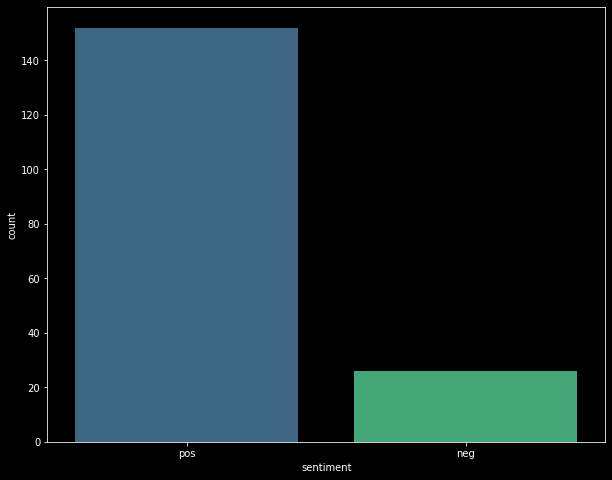

In [82]:
plt.style.use('dark_background')  

plt.figure(figsize=(10,8))
sns.countplot(x = df['sentiment'], palette='viridis');


interval columns not set, guessing: ['retweets_count', 'replies_count', 'likes_count']


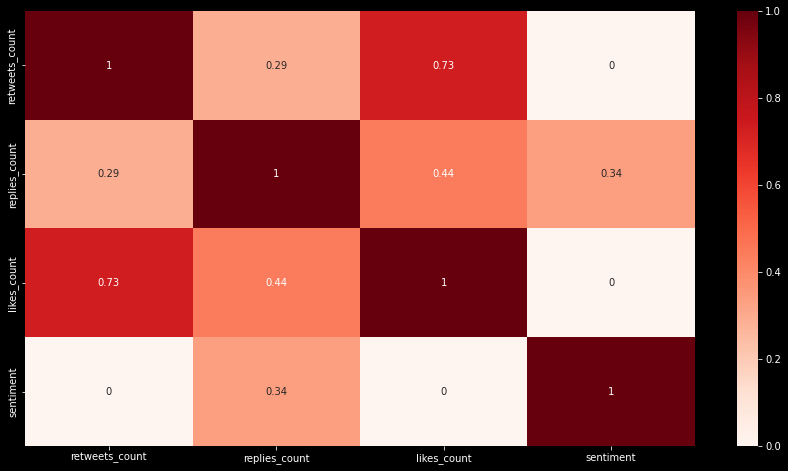

In [83]:
metrics = df[['retweets_count', 'replies_count', 'likes_count', 'sentiment']]
plt.figure(figsize=(15,8))
sns.heatmap(metrics.phik_matrix(), annot=True, cmap='Reds');

The sentiment only correlates (very weakly) with the replies an not with retweets nor likes.

### 2. Text Pre-processing

 - Removing links (http | https)

In [84]:
cleaned_tweets = []
df['tidy_tweets'] = df['tweet']

for index, row in df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

# We are keeping cleaned tweets in a new column called 'tidy_tweets'
df['tidy_tweets'] = cleaned_tweets
df.head()

,id,tweet,date,retweets_count,replies_count,likes_count,quote_url,sentiment,tidy_tweets
0,1577654769098842112,Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de @GenyusSchool descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉 https://t.co/uaEMCO1jGy https://t.co/80gibJEUcI,2022-10-05,2,0,3,NaN,pos,Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de @GenyusSchool descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉
1,1577564440530124802,¡Feliz Día a nuestros Lead Instructors y Teacher Assistants! 🎉 Sabemos que en ocasiones un #bootcamp es duro para tod@s pero cada día dais el 💯% ¡Gracias por hacer lo #digital mucho más fácil! #diamundialdelosdocentes #data #ciber #desarrollowebfullstack #mkt #uxui #cloud https://t.co/Qnehy8ODCq,2022-10-05,2,0,2,NaN,pos,¡Feliz Día a nuestros Lead Instructors y Teacher Assistants! 🎉 Sabemos que en ocasiones un #bootcamp es duro para tod@s pero cada día dais el 💯% ¡Gracias por hacer lo #digital mucho más fácil! #diamundialdelosdocentes #data #ciber #desarrollowebfullstack #mkt #uxui #cloud
2,1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀",2022-10-04,2,0,12,NaN,pos,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀"
3,1576951801047179264,"¡Vuelven las #becas Digital Talent Pipeline! 1⃣0⃣0⃣ becas para formarte en la próxima edición de nuestros #bootcamp en Madrid, Valencia y Sevilla. ¡Solicita ya tu beca!🏃‍♀️ https://t.co/V5kikwpJrD #dtp #becasformacion #digitaltalent https://t.co/q7RVbD2iLU",2022-10-03,1,0,1,NaN,pos,"¡Vuelven las #becas Digital Talent Pipeline! 1⃣0⃣0⃣ becas para formarte en la próxima edición de nuestros #bootcamp en Madrid, Valencia y Sevilla. ¡Solicita ya tu beca!🏃‍♀️ #dtp #becasformacion #digitaltalent"
4,1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 Descubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻 Toda la información aquí! 👇 https://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX,2022-10-03,3,0,3,NaN,pos,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 Descubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻 Toda la información aquí! 👇


 - Removing '@users'

In [85]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [87]:
df['tidy_tweets'] = np.vectorize(remove_pattern)(df['tidy_tweets'], "@[\w]*")
df.head()

,id,tweet,date,retweets_count,replies_count,likes_count,quote_url,sentiment,tidy_tweets
0,1577654769098842112,Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de @GenyusSchool descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉 https://t.co/uaEMCO1jGy https://t.co/80gibJEUcI,2022-10-05,2,0,3,NaN,pos,Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉
1,1577564440530124802,¡Feliz Día a nuestros Lead Instructors y Teacher Assistants! 🎉 Sabemos que en ocasiones un #bootcamp es duro para tod@s pero cada día dais el 💯% ¡Gracias por hacer lo #digital mucho más fácil! #diamundialdelosdocentes #data #ciber #desarrollowebfullstack #mkt #uxui #cloud https://t.co/Qnehy8ODCq,2022-10-05,2,0,2,NaN,pos,¡Feliz Día a nuestros Lead Instructors y Teacher Assistants! 🎉 Sabemos que en ocasiones un #bootcamp es duro para tod pero cada día dais el 💯% ¡Gracias por hacer lo #digital mucho más fácil! #diamundialdelosdocentes #data #ciber #desarrollowebfullstack #mkt #uxui #cloud
2,1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀",2022-10-04,2,0,12,NaN,pos,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en , en el que tendremos la gran suerte de contar con para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀"
3,1576951801047179264,"¡Vuelven las #becas Digital Talent Pipeline! 1⃣0⃣0⃣ becas para formarte en la próxima edición de nuestros #bootcamp en Madrid, Valencia y Sevilla. ¡Solicita ya tu beca!🏃‍♀️ https://t.co/V5kikwpJrD #dtp #becasformacion #digitaltalent https://t.co/q7RVbD2iLU",2022-10-03,1,0,1,NaN,pos,"¡Vuelven las #becas Digital Talent Pipeline! 1⃣0⃣0⃣ becas para formarte en la próxima edición de nuestros #bootcamp en Madrid, Valencia y Sevilla. ¡Solicita ya tu beca!🏃‍♀️ #dtp #becasformacion #digitaltalent"
4,1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 Descubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻 Toda la información aquí! 👇 https://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX,2022-10-03,3,0,3,NaN,pos,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 Descubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de 💻 Toda la información aquí! 👇


 - Removing Punctuations, Numbers and Special characters

1⃣

In [88]:

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\¡)|(\?)|(\¿)|(\@)|(\#)|(\%)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\⃣)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_text(text):
    
    text = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in text]
    text = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in text]
    
    return text

In [89]:
text = df['tidy_tweets']
text_clean = preprocess_text(text)

In [90]:
df['tidy_tweets'] = text_clean
df.head(5)

,id,tweet,date,retweets_count,replies_count,likes_count,quote_url,sentiment,tidy_tweets
0,1577654769098842112,Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de @GenyusSchool descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉 https://t.co/uaEMCO1jGy https://t.co/80gibJEUcI,2022-10-05,2,0,3,NaN,pos,ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos con el programa de descubren su yo emprendedor mientras se divierten👏 aún estás a tiempo👉
1,1577564440530124802,¡Feliz Día a nuestros Lead Instructors y Teacher Assistants! 🎉 Sabemos que en ocasiones un #bootcamp es duro para tod@s pero cada día dais el 💯% ¡Gracias por hacer lo #digital mucho más fácil! #diamundialdelosdocentes #data #ciber #desarrollowebfullstack #mkt #uxui #cloud https://t.co/Qnehy8ODCq,2022-10-05,2,0,2,NaN,pos,feliz día a nuestros lead instructors y teacher assistants 🎉 sabemos que en ocasiones un bootcamp es duro para tod pero cada día dais el 💯 gracias por hacer lo digital mucho más fácil diamundialdelosdocentes data ciber desarrollowebfullstack mkt uxui cloud
2,1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀",2022-10-04,2,0,12,NaN,pos,recordaros que la semana que viene tenemos la primera quedada cps en madrid en en el que tendremos la gran suerte de contar con para que nos dé una charla las plazas se han agotado pero os podéis apuntar al grupo para próximas quedadas 🚀
3,1576951801047179264,"¡Vuelven las #becas Digital Talent Pipeline! 1⃣0⃣0⃣ becas para formarte en la próxima edición de nuestros #bootcamp en Madrid, Valencia y Sevilla. ¡Solicita ya tu beca!🏃‍♀️ https://t.co/V5kikwpJrD #dtp #becasformacion #digitaltalent https://t.co/q7RVbD2iLU",2022-10-03,1,0,1,NaN,pos,vuelven las becas digital talent pipeline becas para formarte en la próxima edición de nuestros bootcamp en madrid valencia y sevilla solicita ya tu beca🏃‍♀️ dtp becasformacion digitaltalent
4,1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 Descubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻 Toda la información aquí! 👇 https://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX,2022-10-03,3,0,3,NaN,pos,el desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 descubre nuestro bootcamp desarrollo web full stack de la mano de 💻 toda la información aquí 👇


 - Removing emojis

In [93]:
def clean_emoji(text):

    emoji_text = re.compile("["
                           u"\U0001F600-\U0001F94F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_text.sub(r'', text)

In [94]:
df['tidy_tweets'] = df['tidy_tweets'].apply(clean_emoji)
df.head()

,id,tweet,date,retweets_count,replies_count,likes_count,quote_url,sentiment,tidy_tweets
0,1577654769098842112,Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de @GenyusSchool descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉 https://t.co/uaEMCO1jGy https://t.co/80gibJEUcI,2022-10-05,2,0,3,NaN,pos,ya están aquí nuestros primeros mini emprendedores pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos con el programa de descubren su yo emprendedor mientras se divierten aún estás a tiempo
1,1577564440530124802,¡Feliz Día a nuestros Lead Instructors y Teacher Assistants! 🎉 Sabemos que en ocasiones un #bootcamp es duro para tod@s pero cada día dais el 💯% ¡Gracias por hacer lo #digital mucho más fácil! #diamundialdelosdocentes #data #ciber #desarrollowebfullstack #mkt #uxui #cloud https://t.co/Qnehy8ODCq,2022-10-05,2,0,2,NaN,pos,feliz día a nuestros lead instructors y teacher assistants sabemos que en ocasiones un bootcamp es duro para tod pero cada día dais el gracias por hacer lo digital mucho más fácil diamundialdelosdocentes data ciber desarrollowebfullstack mkt uxui cloud
2,1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀",2022-10-04,2,0,12,NaN,pos,recordaros que la semana que viene tenemos la primera quedada cps en madrid en en el que tendremos la gran suerte de contar con para que nos dé una charla las plazas se han agotado pero os podéis apuntar al grupo para próximas quedadas
3,1576951801047179264,"¡Vuelven las #becas Digital Talent Pipeline! 1⃣0⃣0⃣ becas para formarte en la próxima edición de nuestros #bootcamp en Madrid, Valencia y Sevilla. ¡Solicita ya tu beca!🏃‍♀️ https://t.co/V5kikwpJrD #dtp #becasformacion #digitaltalent https://t.co/q7RVbD2iLU",2022-10-03,1,0,1,NaN,pos,vuelven las becas digital talent pipeline becas para formarte en la próxima edición de nuestros bootcamp en madrid valencia y sevilla solicita ya tu beca‍ dtp becasformacion digitaltalent
4,1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 Descubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻 Toda la información aquí! 👇 https://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX,2022-10-03,3,0,3,NaN,pos,el desarrollador web es uno de los perfiles más demandados en el mercado laboral descubre nuestro bootcamp desarrollo web full stack de la mano de toda la información aquí


 - Stop Words

In [95]:

stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.tidy_tweets.split() if not word in stopwords and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
df['absolute_tidy_tweets'] = cleaned_tweets
df.head()

,id,tweet,date,retweets_count,replies_count,likes_count,quote_url,sentiment,tidy_tweets,absolute_tidy_tweets
0,1577654769098842112,Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de @GenyusSchool descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉 https://t.co/uaEMCO1jGy https://t.co/80gibJEUcI,2022-10-05,2,0,3,NaN,pos,ya están aquí nuestros primeros mini emprendedores pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos con el programa de descubren su yo emprendedor mientras se divierten aún estás a tiempo,aquí primeros mini emprendedores pasándoselo grande mientras empiezan proceso ideación proyectos programa descubren emprendedor mientras divierten aún tiempo
1,1577564440530124802,¡Feliz Día a nuestros Lead Instructors y Teacher Assistants! 🎉 Sabemos que en ocasiones un #bootcamp es duro para tod@s pero cada día dais el 💯% ¡Gracias por hacer lo #digital mucho más fácil! #diamundialdelosdocentes #data #ciber #desarrollowebfullstack #mkt #uxui #cloud https://t.co/Qnehy8ODCq,2022-10-05,2,0,2,NaN,pos,feliz día a nuestros lead instructors y teacher assistants sabemos que en ocasiones un bootcamp es duro para tod pero cada día dais el gracias por hacer lo digital mucho más fácil diamundialdelosdocentes data ciber desarrollowebfullstack mkt uxui cloud,feliz día lead instructors teacher assistants sabemos ocasiones bootcamp duro tod cada día dais gracias hacer digital fácil diamundialdelosdocentes data ciber desarrollowebfullstack mkt uxui cloud
2,1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀",2022-10-04,2,0,12,NaN,pos,recordaros que la semana que viene tenemos la primera quedada cps en madrid en en el que tendremos la gran suerte de contar con para que nos dé una charla las plazas se han agotado pero os podéis apuntar al grupo para próximas quedadas,recordaros semana viene primera quedada cps madrid gran suerte contar dé charla plazas agotado podéis apuntar grupo próximas quedadas
3,1576951801047179264,"¡Vuelven las #becas Digital Talent Pipeline! 1⃣0⃣0⃣ becas para formarte en la próxima edición de nuestros #bootcamp en Madrid, Valencia y Sevilla. ¡Solicita ya tu beca!🏃‍♀️ https://t.co/V5kikwpJrD #dtp #becasformacion #digitaltalent https://t.co/q7RVbD2iLU",2022-10-03,1,0,1,NaN,pos,vuelven las becas digital talent pipeline becas para formarte en la próxima edición de nuestros bootcamp en madrid valencia y sevilla solicita ya tu beca‍ dtp becasformacion digitaltalent,vuelven becas digital talent pipeline becas formarte próxima edición bootcamp madrid valencia sevilla solicita beca‍ dtp becasformacion digitaltalent
4,1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 Descubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻 Toda la información aquí! 👇 https://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX,2022-10-03,3,0,3,NaN,pos,el desarrollador web es uno de los perfiles más demandados en el mercado laboral descubre nuestro bootcamp desarrollo web full stack de la mano de toda la información aquí,desarrollador web perfiles demandados mercado laboral descubre bootcamp desarrollo web full stack mano toda información aquí


### 3. Vectorization

In [96]:
from sklearn.feature_extraction.text import CountVectorizer 

In [97]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['absolute_tidy_tweets'])
#vectorizer.get_feature_names()

In [98]:
baseline_vectorizer = CountVectorizer(binary=True)
baseline_vectorizer.fit(df['absolute_tidy_tweets'])

CountVectorizer(binary=True)

In [99]:
X_baseline = baseline_vectorizer.transform(df['absolute_tidy_tweets'])


In [100]:
x = baseline_vectorizer.vocabulary_

In [105]:
top_words = sorted(x.items(), key=lambda item: item[1], reverse = True)
top_words[:25]

[('último', 1111),
 ('últimasentradas', 1110),
 ('últimas', 1109),
 ('última', 1108),
 ('éxito', 1107),
 ('área', 1106),
 ('ánimo', 1105),
 ('ámbito', 1104),
 ('ágora', 1103),
 ('zoom', 1102),
 ('zonas', 1101),
 ('zas', 1100),
 ('youtube', 1099),
 ('you', 1098),
 ('yesterday', 1097),
 ('yes', 1096),
 ('yellowers', 1095),
 ('xdd', 1094),
 ('working', 1093),
 ('with', 1092),
 ('were', 1091),
 ('wellness', 1090),
 ('week', 1089),
 ('webapps', 1088),
 ('web', 1087)]

- n-grams

In [106]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

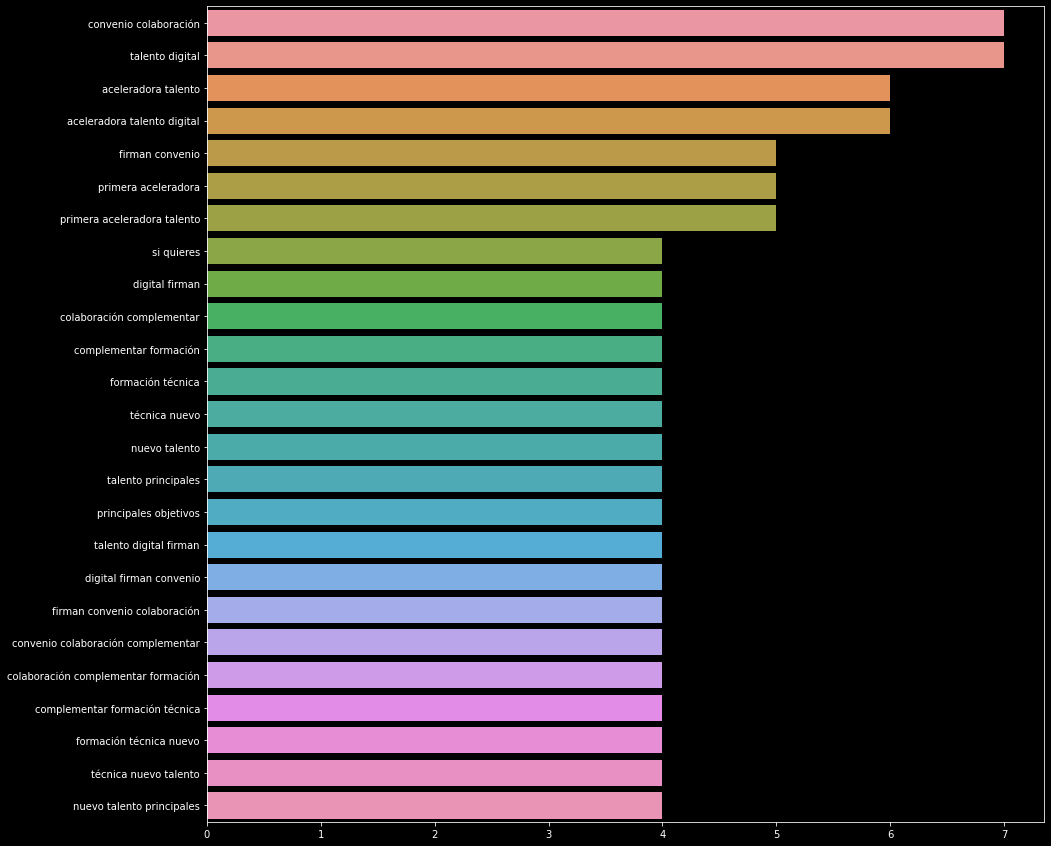

In [107]:
plt.figure(figsize=(15,15))
top_tweet_bigrams=get_top_tweet_bigrams(df['absolute_tidy_tweets'])[:25]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x);

### 4. Most common words in positive and negative tweets

In [45]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_words = 20, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [46]:
all_words_pos = ' '.join([text for text in df['absolute_tidy_tweets'][df.sentiment == 'pos']])
all_words_neg = ' '.join([text for text in df['absolute_tidy_tweets'][df.sentiment == 'neg']])


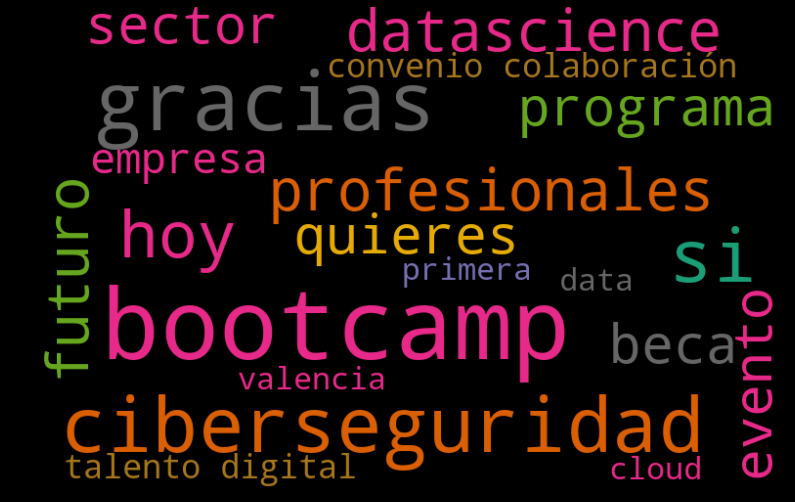

In [47]:
generate_wordcloud(all_words_pos)

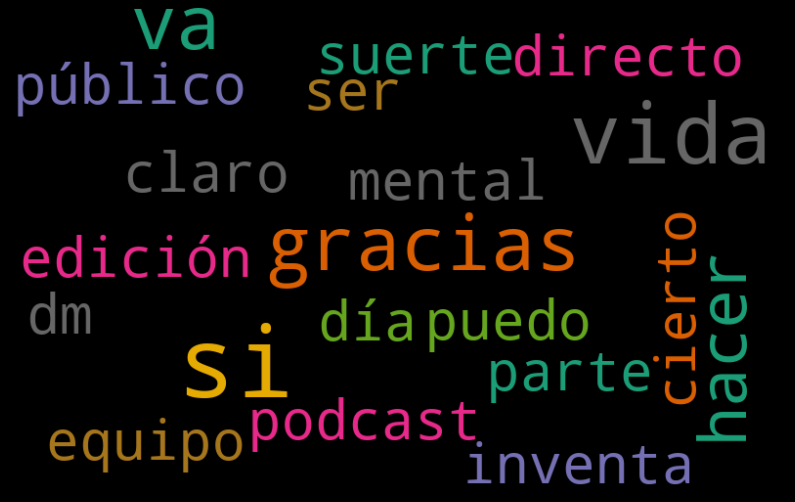

In [48]:
generate_wordcloud(all_words_neg)

#### Thers's a significant difference between positive and negative tweets:
 - positive tweets mention 'bootcamp' and 'scholarship', and IT fields as Data Science and Cyber Security;
 - we also found words related to the work, as 'profesionals', 'company', 'sector', and 'internship agreement';
 - we can see positive words like 'tanhk you', 'future' or 'first';
 - negative tweets also use positive words as 'thank you' or 'sure', bur probably in a sarcastic way;
 - wa also found words relative to media, as 'podcast' or 'live'

### 5. Most commonly used Hashtags

In [49]:
# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count", palette = 'viridis')
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [50]:
hashtags_pos = hashtag_extract(df['tweet'][df.sentiment == 'pos'])
hashtags_pos = sum(hashtags_pos, [])
hashtags_neg = hashtag_extract(df['tweet'][df.sentiment == 'neg'])
hashtags_neg = sum(hashtags_neg, [])

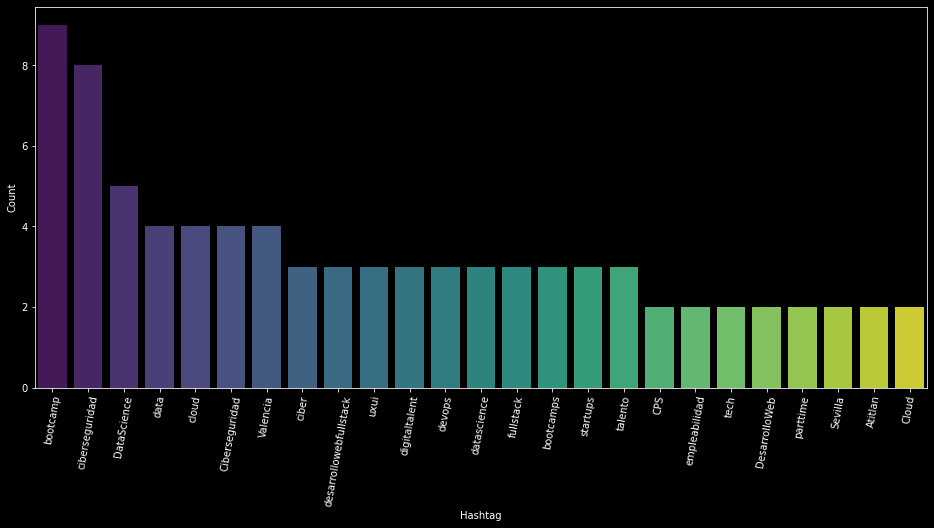

In [51]:
generate_hashtag_freqdist(hashtags_pos)

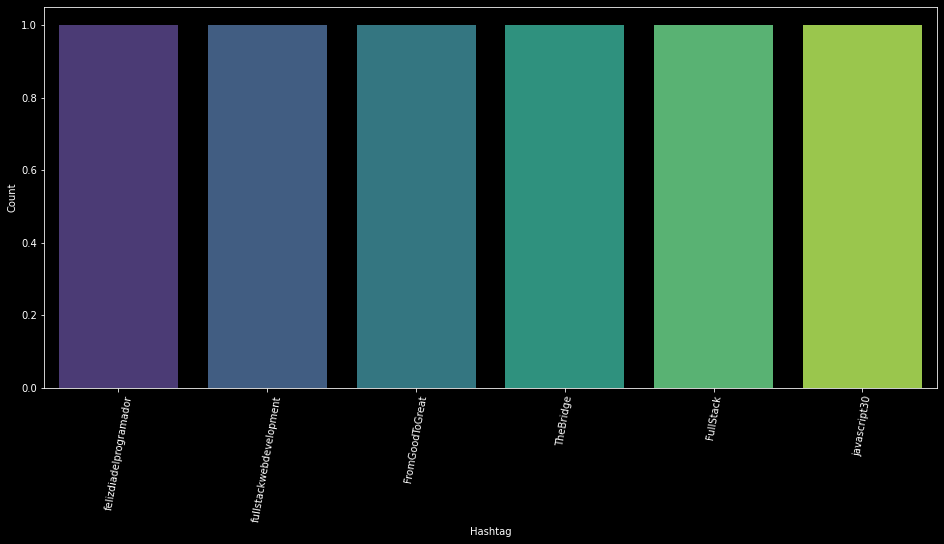

In [52]:
generate_hashtag_freqdist(hashtags_neg)

#### Theres's a difference between positive and negative hashtags:
 - the hashtags of negative tweets are related to programming, specifically to development
 - they also mention the School and their motto 'From god to great'
 - those of positive tweets refers to the courses ('bootcamps') and their contents, specially Cyber Security, Data Science Full Stack and Cloud
 - they also mention different locations of the school as Valencia or Sevilla
 - we also found mentions to 'talent' and 'digital talent'